In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/Covid_Experiences.csv')
df

,Users,Experiences
0,User-1,"Whenever we go out, we armed ourselves with Gl..."
1,User-2,I am assuming Day 0 (say T) i.e June 10th as t...
2,User-3,I was tested positive for Covid and before I s...
3,User-4,Well it is a bit difference experience for me ...
4,User-5,I had very similar symptoms of Covid or Corona...
5,User-6,Virus can affect everyone 40+ people need to b...
6,User-7,25th October - 1st day of slight fever\n26th O...
7,User-8,Day-wise Coronavirus Symptoms:\nA day to day c...
8,User-9,Being diagnosed with the Coronavirus was more ...
9,User-10,This is a true story of one of my friend in hi...


In [ ]:
from bs4 import BeautifulSoup
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from dateutil import parser
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#Functions for NLP


def lowercase(input):
  """
  Returns lowercase text
  """
  return input.lower()

def remove_punctuation(input):
  """
  Returns text without punctuation
  """
  return input.translate(str.maketrans('','', string.punctuation))

def remove_whitespaces(input):
  """
  Returns text without extra whitespaces
  """
  return " ".join(input.split())

def remove_html_tags(input):
  """
  Returns text without HTML tags
  """
  soup = BeautifulSoup(input, "html.parser")
  stripped_input = soup.get_text(separator=" ")
  return stripped_input

def tokenize(input):
  """
  Returns tokenized version of text
  """
  return word_tokenize(input)

def remove_stop_words(input):
  """
  Returns text without stop words
  """
  input = word_tokenize(input)
  return [word for word in input if word not in stopwords.words('english')]

def lemmatize(input):
  """
  Lemmatizes input using NLTK's WordNetLemmatizer
  """
  lemmatizer=WordNetLemmatizer()
  input_str=word_tokenize(input)
  new_words = []
  for word in input_str:
    new_words.append(lemmatizer.lemmatize(word))
  return ' '.join(new_words)


def stemming(text):
    snowball = SnowballStemmer(language='english')
    list=[]
    for token in word_tokenize(text):
        list.append(snowball.stem(token))
    return ' '.join(list)

def nlp_pipeline(input):
  """
  Function that calls all other functions together to perform NLP on a given text
  """
  return stemming(lemmatize(' '.join(remove_stop_words(remove_whitespaces(remove_punctuation(remove_html_tags(lowercase(input))))))))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df_final = df.drop(columns='Users')
df_final

,Experiences
0,"Whenever we go out, we armed ourselves with Gl..."
1,I am assuming Day 0 (say T) i.e June 10th as t...
2,I was tested positive for Covid and before I s...
3,Well it is a bit difference experience for me ...
4,I had very similar symptoms of Covid or Corona...
5,Virus can affect everyone 40+ people need to b...
6,25th October - 1st day of slight fever\n26th O...
7,Day-wise Coronavirus Symptoms:\nA day to day c...
8,Being diagnosed with the Coronavirus was more ...
9,This is a true story of one of my friend in hi...


In [ ]:
for index, row in df_final.iterrows():
    nlp_pipeline(row['Experiences'])

In [ ]:
df['preprocessed_review'] = df['Experiences'].apply(lambda x: nlp_pipeline(x))
df.head()

,Users,Experiences,preprocessed_review
0,User-1,"Whenever we go out, we armed ourselves with Gl...",whenev go arm glove mask sanit buy separ bag m...
1,User-2,I am assuming Day 0 (say T) i.e June 10th as t...,assum day 0 say ie june 10th day covid19 sympt...
2,User-3,I was tested positive for Covid and before I s...,test posit covid share experi would like give ...
3,User-4,Well it is a bit difference experience for me ...,well bit differ experi compar other coughno fe...
4,User-5,I had very similar symptoms of Covid or Corona...,similar symptom covid coronavirus infect also ...


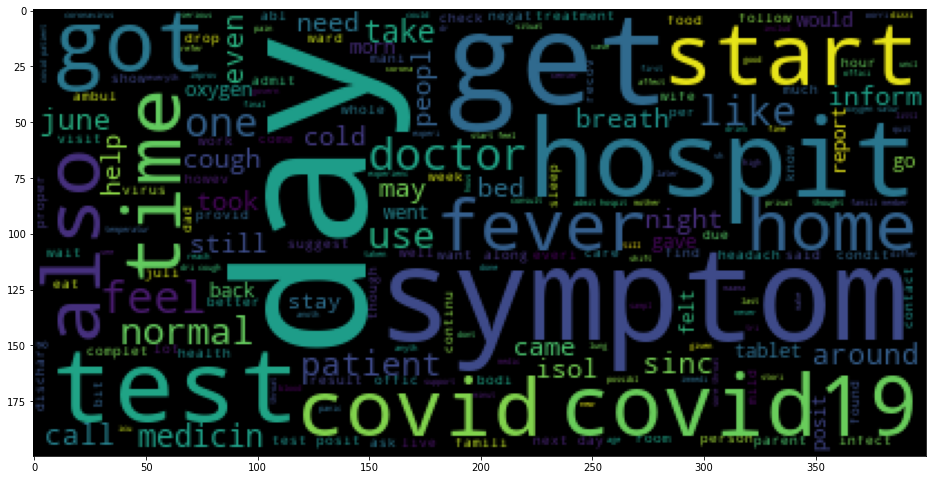

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

words_list = df['preprocessed_review'].unique().tolist()
words = " ".join(words_list)

wordcloud =  WordCloud(stopwords=stop_words).generate(words)

plt.figure(figsize=(16, 16))
plt.imshow(wordcloud)
plt.show()

In [ ]:
def nltk_ner(document):
  return {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(document))) if hasattr(chunk, 'label') }

In [ ]:
#doc = '''	test posit covid share experi would like give brief introduct banker profess may awar bank run full capac even lockdown also fit freak though gym close use workout home lockdown unlock happen went outdoor train long distanc run 15th june even offic got small nap woke dinner left eye blurri vision thought temporari problem slept dinner next day dizzi drive around 22 km offic whole day dizzi could concentr monitor screen check bp offic doctor higher borderlin pharmacist gave medicin vertigo felt well left day around 530pm bit earlier normal time came home slight temperatur immedi got isol famili member took leav next 2 day two day temperatur never went 995f dizzi prevail never knew dizzi symptom covid 19 also cough dri though rule coronavirus 19th join offic dizzi uneasi problem tingl sensat hand foot year back branch central ac felt sensat felt cold also fever apettit could smell tast though bitter fever took leav next day went see eye specialist everyth fine refer neurologist next day solar eclips whole day post breakfast slept felt well thought see neurologist monday even got news one ladi colleagu deput branch 1 week ago test posit covid 19 colleagu start call ok frighten howev fine dizzi disappear went offic monday well minut breath issu took deep breath drank warm water felt better 30 min problem anoth offic branch also unwel last week join offic day news spread u test posot corona got call offic union branch ask well entir branch along driver housekeep staff went swab test privat lab next day branch kept close result next day expect result howev fine physic hour pass got tens around 7 pm bar 3 u result ’ everyon test negat moment terrifi around 9 pm got call one colleagu inform test posit inform wife dental surgeon covid duti hadnt met atleast 15 day protocol parent 15 minut later got call state health dept ask address person inform registr purpos state assam option home isol coronavirus patient mandatorili go hospitalcovid care centr terribl part pack bag dinner start get call couldnt get proper sleep whole night next day morn around 10 got call medic team ask address medic team along polic offici reach home ask detail contact histori stick notic gate click selfi left around 30 min ambul arriv taken hospit follow around 8–9 polic local peopl gather hous made containt zone parent ask leav campus next 14 day reach hospit taken registr place took detail provid one bucket along essenti ask take empti bed settl lunch till medicin provid fine thought sampl taken would test negat protocol second sampl taken 8th day 1st sampl date govt lab state result given 6–7 day test govt centr time get result get admit time second sampl sinc test privat lab wait 6 day test food averag hospit cleanli issu share toilet doctor wouldnt come issu nurs came gave vit c b complex tab cough syrup everyday hot water gargl betadin took steam inhal drank hot water morn yoga wife provid essenti includ snack tea bag meantim total lockdown happen citi guwahati parent provid groceri relat neighbour howev hous sanit 2 day coupl boy came provid groceri worth hard around 200 ruppe state famili corona patient provid amen worth 2000 ruppe famili member cant go outsid come first corrupt wife gave sampl hospit swab parent collect home howev got messag swab father wife taken data entri error everyon talk state alleg mani negat patient taken hospit forc later came know food serv cost around r 500 per day per person probabl anoth corrupt govt money go pocket contractorsoffici call differ depart panchayat peopl get hous sanit arrang groceri famili member 1st juli second sampl taken 2nd anoth sampl taken anoth manual error probabl sampl misplac argu technician back back sampl taken said want give give els stay hospit oblig result come thought becam negat stay week hospit becom postiv 4th juli around 7 pm inform would discharg day happi corona stori hous still contain zone result parent still pend 8 day wife test negat peopl came today provid groceri citi still lockdown stay safe use masksi alway maintain social distanc use hot water take enough vit c boost immunti gargl hot water dont panic social stigma virus edit 1 parent negat isol period got today resum duti nowhappi'''
doc = '''I had very similar symptoms of Covid or Coronavirus infection. I also had to admitted to hospital for almost 10 days. But all of my covid test reports were negative. So here is my story :- On 27th May Night - 28th May Early morning, I started feeling cold while I was doing my night shift. After i completed my shift and stood up from my chair, I felt something wrong with as my body temperature was not normal. So I ate Dolo and slept. On 28th May whole day, I was taking Dolo after few hours gap but it was not providing any relief. On 29th May, I called my Uncle since he is doctor. He suggested to Anti-biotics and Dolo for couple of days. Till 31st May, In day time, my condition was ok but in night temp is starting to rise. So my uncle suggested some blood and urine tests. On 1st June, I have gone through medical tests but reports were normal but my problem started to increase. Till 3rd June, The whole process was same like going through more medical test and they were normal. I started feeling weakness and unable to eat much. My uncle is in different city so he suggested to consult doctor near by which can check me physically. On 4th June, I visited and consulted to known doctor’ clinic and he changed my medicine little bit and again suggested similar medical test. He suggested Covid test. My wife also have very minor fever like 99.5 F. On 5th-6th June, Due to anti-biotics or infection, I am unable to eat and started vomiting, so my uncle suggested to eat\drink something cold so stomach feel little better and i can eat something. Also I have high fever in both days too like 104 or 105 F. There was some problem with Delhi Govt, Central Govt and ICMR so Covid testing was not getting done. On 7th June, Doctor nearby to my home, suggested to use oxymeter to track my SP02, since i am barely able to walk and suggested X-ray of my chest. My SPO2 level was around 90–91 when i have tested first time. But it stared to drop as day progress and also my chest’s X-ray report was showing some infection\patches in lungs. Due to Sunday most of the nearby labs were closed so i was unable to take covid test. On 8th June, My SPO2 level dropped to 83–84 so Doctor advised to admitted to hospital. Getting bed with ventilator was challenge in early June since I didn’t have covid report. So somehow our doctor able to find bed from his reference in near by hospital. So I admitted to hospital in afternoon. I was admitted ICU Isolation ward and covid patients were all around me. I was able to get oxygen but not the ventilator. On 9th June, Finally my covid test has been done. But still my SPO2 was dropping and as per medical staff in ICU it was dropped to below 70. I was having problem when i stand-up and walk for toilet. So in night, hospital called my family and referred me to shift to another hospital since they didn’t have ventilator. My family called and used all reference to find a bed with ventilator but they failed. Since I am covid suspected patient till now so finding a bed in hospital was not easy. So my family called CMO helpline and they assured to provide bed with ventilator in GTB Shahdara hospital. On 10th June Midnight\Early night, When we reached there, hospital gets furies when we took CMO reference. But they provided my oxygen and done my some blood tests and X-Ray. My family have to take me here and there for different formalities on stretcher. But hospital denied bed with ventilator in ICU since they don’t have it and also since I was covid suspected patient so they can’t keep me with covid positive patient. They admitted me in general ward (a dark room kind of) with oxygen but no one to take care. I need proper care at that time as i can’t move much due to lack of oxygen and weakness in body. So my family again started to find better hospital for me since we know that i can’t survive in that GTB Shahdara hospital due insufficient care and services. Finally we were able to find bed in ICU in different private hospital but they also didn’t have ventilator. We had no option at that time. so around 5 am i was admitted to 3rd hospital. At that time there were only 2 other covid patients in ICU but they were normal. Hospital assigned bed which have good distance from covid patients bed since they have empty beds in ICU. so again I got oxygen and finally I got sleep. On 10th June Day time, I was getting medicine and drips and little better care from medical staff. My condition was same like mild fever and weakness and breathing issue. Finally my report came in night and I was Covid negative. I was still in ICU for night. On 11th June, I was shifted to HDU in morning. Same hospital day routine like blood test, X-ray, medicine and all. At end of the day I started to feel little better. On 12th June, New covid suspected patient admitted to my ward. She had similar symptoms as I had but more serious. Her covid-19 test taken my third party lab. With in 5–6 hours of admitted to hospital she died. I have seen my grandmother getting died due to her age this year before this pandemic started. But watching that lady die in front of me in hospital was different exp. My condition was improving On 13th June, Since my condition was improving and more covid suspected patients were coming in my ward so I\My family asked doctor to shift me ward or room with no suspected covid patient. Since i was covid negative we have feared that i still have high chances to get infected. So Doctor asked to go through another covid test just to make i am still covid neagtive. So my test sample have been taken along with newly admitted covid suspected patients. But one of them died. He was fine till afternoon since he ate his lunch and done comb in his hair too and was looking normal but he died in next 2 hours. I was getting more nervous in fear of getting infected. On 14th June. I didn’t required oxygen support so i started to live normally. Still waiting for result of my covid test but report didn’t came since it was Sunday. Again one more covid suspected patient expired. I was getting more nervous but getting normal to seeing whole thing. On 15th June, Normal hospital routine and getting better. Started to do more physical activity like taking care of all my things and not relying on medical staff since chances of infection from medical staff is still high. They also suggested to take medicine or check temp by myself to avoid any physical contact. I can walk, change cloth and adjust my bed. I was feeling so better that i want to go home. But still hospital was waiting for my covid report. Don’t like to add but again one more covid suspected patient expired. Also one covid positive patient in ICU expired. On 16th June, In morning finally report came and I am again covid negative. I didn’t wasted a min and called my family to talk with hospital to shift me in private room or discharge me since i am feeling much better now. My SPO2 level was 95–97. With whole experienced I am even don’t want to spent more time in shared ward till I get discharge. But they didn’t discharged me. On 17th June, Finally time came to be discharge from hospital. Whole Mediclaim process started and but final approval same around 10 PM. So i reached home around 11:30 PM. I live in 2nd floor so after climbing the stairs i had little breathing issue for 5–7 min which is normal. My wife was still in isolation at home and feeling fine. Since my first covid report was negative on 9th June so my wife didn’t took covid test. After coming to home I also lived in isolation till 22nd June. I also started light office work from 22nd June like checking emails and communicating with clients. My treatment was done as per covid protocol and similar to covid patient. I was in hospital for 10 days with serious covid patient and all those patient expired were found covid positive when reports came. So I am not sure that If i was covid positive or not. May be medicine i took between 27th May to 9th June helped me to develop anti-bodies and recovered from covid. So i survived without getting infected again in hospital between covid patient. It has been around 3 weeks now, My SPO2 level is normal between 97–99…even sometimes 100 too. My temp is also normal. I am able to walk. Getting back to normal life. still taking all the precaution like wearing mask if i need to go out of home. Eating lots of fruits and avoid eating\drinking cold items or outside food. Taking steam once a day and drink warm water twice a day. Eat lots of fruits.	'''
nltk_ner(doc)

{('CMO', 'ORGANIZATION'),
 ('Central Govt', 'ORGANIZATION'),
 ('Coronavirus', 'GPE'),
 ('Covid', 'PERSON'),
 ('Delhi Govt', 'PERSON'),
 ('Doctor', 'PERSON'),
 ('Dolo', 'PERSON'),
 ('Don', 'PERSON'),
 ('Due', 'PERSON'),
 ('Finally', 'PERSON'),
 ('GTB Shahdara', 'ORGANIZATION'),
 ('HDU', 'ORGANIZATION'),
 ('Hospital', 'ORGANIZATION'),
 ('ICMR', 'ORGANIZATION'),
 ('ICU', 'ORGANIZATION'),
 ('ICU Isolation', 'ORGANIZATION'),
 ('My', 'PERSON'),
 ('New', 'GPE'),
 ('Night', 'PERSON'),
 ('Normal', 'GPE'),
 ('SP02', 'ORGANIZATION'),
 ('SPO2', 'ORGANIZATION'),
 ('Whole Mediclaim', 'PERSON')}

In [ ]:
dict = {}

for i in range(15):
  dict[i] = nltk_ner(df['Experiences'][i])

In [ ]:
dict

{0: {('Amla', 'ORGANIZATION'),
  ('Arogya', 'GPE'),
  ('BP', 'ORGANIZATION'),
  ('Bags', 'GPE'),
  ('Blood', 'PERSON'),
  ('Body', 'PERSON'),
  ('Bro', 'PERSON'),
  ('Cold', 'ORGANIZATION'),
  ('Corona', 'GPE'),
  ('Corona', 'ORGANIZATION'),
  ('Corona', 'PERSON'),
  ('Covid', 'PERSON'),
  ('Dettol', 'PERSON'),
  ('Dry', 'PERSON'),
  ('Egg', 'PERSON'),
  ('Ekukatudangal', 'GPE'),
  ('Enroute', 'PERSON'),
  ('Gloves', 'PERSON'),
  ('Govt', 'PERSON'),
  ('Govt Help', 'PERSON'),
  ('Head', 'PERSON'),
  ('Healthy', 'PERSON'),
  ('Heart', 'PERSON'),
  ('Home', 'PERSON'),
  ('Hostel', 'ORGANIZATION'),
  ('Hot', 'ORGANIZATION'),
  ('Induction', 'GPE'),
  ('Lysol', 'GPE'),
  ('Mask', 'PERSON'),
  ('Milk', 'PERSON'),
  ('Non', 'PERSON'),
  ('Pepper', 'GPE'),
  ('Platelets', 'ORGANIZATION'),
  ('Pongal', 'GPE'),
  ('Portea', 'PERSON'),
  ('Private', 'ORGANIZATION'),
  ('Risk', 'GPE'),
  ('Road', 'PERSON'),
  ('Rock', 'GPE'),
  ('Sanitizers', 'ORGANIZATION'),
  ('Sore', 'GPE'),
  ('Sore Throat', 

In [ ]:
!pip install spacy
!pip install scispacy
!pip install <Model URL>

     |████████████████████████████████| 44 kB 2.8 MB/s 
     |████████████████████████████████| 6.0 MB 22.7 MB/s 
     |████████████████████████████████| 13.5 MB 56.0 MB/s 
     |████████████████████████████████| 71 kB 8.0 MB/s 
     |████████████████████████████████| 188 kB 71.2 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 10.1 MB 51.6 MB/s 
     |████████████████████████████████| 653 kB 58.7 MB/s 
     |████████████████████████████████| 181 kB 77.3 MB/s 
     |████████████████████████████████| 451 kB 71.1 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      S

In [ ]:
#https://allenai.github.io/scispacy/



import scispacy
import spacy

!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz

     |████████████████████████████████| 15.9 MB 85.7 MB/s 
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.5.0-py3-none-any.whl size=15871046 sha256=1fc386d9e88472a569c87c430281e785f006a3c519e58e4f1e3530908bdfe963
  Stored in directory: /root/.cache/pip/wheels/b1/b8/7d/d26a5894db99bf0cfb9add399889738de91a608e6664f82454
Successfully built en-core-sci-sm


In [ ]:
nlp = spacy.load("en_core_sci_sm")

In [ ]:
bdict = {}

for i in range(15):
  bdict[i] = nlp(df['preprocessed_review'][i])

In [ ]:
bdict

{0: whenev go arm glove mask sanit buy separ bag meant shop head back home wash pack plastic item lysol solut especi one keep fridg virus tend live longer cooler environ veggi fruit wash rock salt turmer powder dri fan pack fridg sinc epicent corona infect took precaut onset though escap wrath corona 3 month corona covid19 virus enter uninvit bodi never ask permiss still wonder came rememb follow symptom corona 1 sore throat 2 head ach 3 bodi pain 4 fever 5 cold 6 dri cough 7 breathless ness symptom pleas refer offici websit symptom sore throat thing stuck throat occasion morn cold mucus administ avail medicin home cough syrup cold act wait day solv health issu went privat clinic prescrib medicin 3 day 3 day improv medium news googl search start haunt happen corona live thought rock mind start listen peopl ’ stori conclud might check famili decid reach govt help first took selfassess test arogya sethu app said risk app contact covid19 care number 1075 base locat automat connect tamil n

In [ ]:
print(list(bdict[0].sents))

[whenev go arm glove mask sanit buy separ bag meant shop head back home wash pack plastic item lysol solut especi one keep fridg virus tend live longer cooler environ veggi fruit wash rock salt turmer powder dri fan pack fridg sinc epicent corona infect took precaut onset though escap wrath corona 3 month corona covid19 virus enter uninvit bodi never ask permiss still wonder came rememb follow symptom corona 1 sore throat 2 head ach 3 bodi pain 4 fever 5 cold 6 dri cough 7 breathless ness symptom pleas refer offici websit symptom sore throat thing stuck throat occasion morn cold mucus administ avail medicin home cough syrup cold act wait day solv health issu went privat clinic prescrib medicin 3 day 3 day improv medium news googl search start haunt happen corona live thought rock mind start listen peopl ’ stori conclud might check famili decid reach govt help first took selfassess test arogya sethu app said risk app contact covid19 care number 1075 base locat automat connect tamil nadu

In [ ]:
print(list(bdict[0].ents))

[whenev, arm glove mask sanit, meant, shop, head back home, plastic item, solut especi, keep fridg virus, longer, cooler environ veggi fruit, fridg, corona, infect, precaut, onset, escap, wrath, corona, month, corona, covid19 virus, ask permiss, rememb, follow, bodi pain, fever 5 cold 6, breathless, ness, symptom pleas, symptom, occasion, morn cold mucus, avail, medicin, home cough, syrup cold act, wait day, solv, health, issu, clinic, prescrib medicin, day, day, improv, medium, news, googl, search, happen, corona, peopl, conclud, decid, risk app, contact, covid19 care, connect tamil nadu care center, contact zone, offic, onlin counsel, nearest, health center doctor test temperatur, tablet, ask come, tomorrow health condit, time 1hour, anxious, wait doctor, recommend, covid19 test, swab test, person, includ, updat, accur, day, anxious, wait earli, morn, person, counsel, noth, privat govern chose, wait, clock, anxious, pick screen center ekukatudang, peopl luckili, batch, peopl center b

In [ ]:
for i in range(15):
  print(list(bdict[i].ents))

[whenev, arm glove mask sanit, meant, shop, head back home, plastic item, solut especi, keep fridg virus, longer, cooler environ veggi fruit, fridg, corona, infect, precaut, onset, escap, wrath, corona, month, corona, covid19 virus, ask permiss, rememb, follow, bodi pain, fever 5 cold 6, breathless, ness, symptom pleas, symptom, occasion, morn cold mucus, avail, medicin, home cough, syrup cold act, wait day, solv, health, issu, clinic, prescrib medicin, day, day, improv, medium, news, googl, search, happen, corona, peopl, conclud, decid, risk app, contact, covid19 care, connect tamil nadu care center, contact zone, offic, onlin counsel, nearest, health center doctor test temperatur, tablet, ask come, tomorrow health condit, time 1hour, anxious, wait doctor, recommend, covid19 test, swab test, person, includ, updat, accur, day, anxious, wait earli, morn, person, counsel, noth, privat govern chose, wait, clock, anxious, pick screen center ekukatudang, peopl luckili, batch, peopl center b

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_craft_md-0.5.0.tar.gz

In [ ]:
nermodel1 = spacy.load("en_ner_craft_md")

In [ ]:
nerdict = {}

for i in range(15):
  nerdict[i] = nermodel1(df['Experiences'][i])

In [ ]:
nerdict[0]

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bionlp13cg_md-0.5.0.tar.gz

In [ ]:
nerm2 = spacy.load("en_ner_bionlp13cg_md")

In [ ]:
bner = {}

for i in range(15):
  bner[i] = nerm2(df['preprocessed_review'][i])

In [ ]:
print(list(bner[0].sents))

[whenev go arm glove mask sanit buy separ bag meant shop head back home wash pack plastic item lysol solut especi one keep fridg virus tend live longer cooler environ veggi fruit wash rock salt turmer powder dri fan pack fridg sinc epicent corona infect took precaut onset though escap wrath corona 3 month corona covid19 virus enter uninvit bodi never ask permiss still wonder came rememb follow symptom corona 1 sore throat 2 head ach 3 bodi pain 4 fever 5 cold 6 dri cough 7 breathless ness symptom pleas refer offici websit symptom sore throat thing stuck throat occasion morn cold mucus administ avail medicin home cough syrup cold act wait day solv health issu went privat clinic prescrib medicin 3 day 3 day improv medium news googl search start haunt happen corona live thought rock mind start listen peopl ’ stori conclud might check famili decid reach govt help first took selfassess test arogya sethu app said risk app contact covid19 care number 1075 base locat automat connect tamil nadu

In [ ]:
print(list(bner[0].ents))

[head back, environ veggi, corona, corona covid19, corona 1, mucus, syrup, corona, u, swab, mobil number comorbidi, platelet, platelet, quarantin, bro, sugar, heart relat, quarantin, stove small, vessel, vessel, water, vessel, neem leav, vessel, ginger, amla lemon, ginger, egg, quarantin, tablet u, u 7, tablet arrang volunt, quarantin, vitamin, continu]


In [ ]:
for i in range(15):
  print(list(bner[i].ents))

[head back, environ veggi, corona, corona covid19, corona 1, mucus, syrup, corona, u, swab, mobil number comorbidi, platelet, platelet, quarantin, bro, sugar, heart relat, quarantin, stove small, vessel, vessel, water, vessel, neem leav, vessel, ginger, amla lemon, ginger, egg, quarantin, tablet u, u 7, tablet arrang volunt, quarantin, vitamin, continu]
[relat, relat, 🤒, 🤒, zone symptom fever cough, u covid19, u victoria hospit vh, patient, uncl, patient, patient, patient, patient, blood, patch lung, blood, patient loos, patient, uncl, influenc, swab, famili ’, 👨, u complet contact, declar, quarantin, escort u, dri, bed floor mom, syrup, loos, syrup, electr, relat, oxygen, oxygen, relat, tri, swab, readi discharg u, u covid19, oxygen]
[long distanc, eye, 530pm, dri, coronavirus 19th, eye, water, centr, empti bed settl lunch, centr, toilet, vit c b complex, syrup, swab, patient, vit c]
[cream, relat, balm neckaround nose forehead, bed, heart, relat, uncl, abl, puls, puls oxygen satur, p

In [ ]:
ner = {}

for i in range(15):
  ner[i] = nerm2(df['Experiences'][i])

In [ ]:
print(list(ner[0].sents))

[Whenever we go out, we armed ourselves with Gloves, Mask and Sanitizers, buy only in separate Bags meant for Shopping.

Once we head back home, we washed packed plastic items in Lysol solutions especially the ones we keep in fridge (as virus tend to live longer in cooler environment)

Veggies and Fruits, we washed in Rock salt and Turmeric powder, dried in fan and packed to fridge.

Since we are in epicenter of Corona infection, we took all precautions., 

*Onset*

Though we escaped from the wrath of Corona for 3 months, Corona @Covid-19 virus entered uninvited to my body., It never asked my permission., Still now I wonder how it came in.

Remember Following are the Symptoms of Corona

1., Sore Throat

2., Head ache

3., Body Pain

4., Fever

5., Cold

6., Dry cough

7., Breathless ness

For further symptoms please refer to official WHO website

Of the above symptoms I had only Sore throat (Some thing stuck on my throat), occasional morning cold with mucus., I administered myself with

In [ ]:
print(list(ner[0].ents))

[head back, Lysol, Rock salt, Turmeric powder, Corona

1, Head ache

3, Breathless, Sore throat, mucus, Syrup, people, App, COVID-19 care, People, people, Blood, Platelet, WBC, Platelets, Sugar, BP, Heart, Covid-19, vessel, water, turmeric., vessel, water, vessel, turmeric, Neem, vessels, surface, people, Covid-19, Milk, turmeric, ginger, palm sugar, green vegetables, greens, sprouts

4, juice, Amla, lemon, ginger, Through-out, Portea, tablets, 7 AM, throat, body, Tablets, tablets, AM, tablets, Zinc, Vitamin, paracetamol, body, people]


In [ ]:
for i in range(15):
  print(list(ner[i].ents))

[head back, Lysol, Rock salt, Turmeric powder, Corona

1, Head ache

3, Breathless, Sore throat, mucus, Syrup, people, App, COVID-19 care, People, people, Blood, Platelet, WBC, Platelets, Sugar, BP, Heart, Covid-19, vessel, water, turmeric., vessel, water, vessel, turmeric, Neem, vessels, surface, people, Covid-19, Milk, turmeric, ginger, palm sugar, green vegetables, greens, sprouts

4, juice, Amla, lemon, ginger, Through-out, Portea, tablets, 7 AM, throat, body, Tablets, tablets, AM, tablets, Zinc, Vitamin, paracetamol, body, people]
[T-2, tender coconuts, T-2, 🤒, 🤒, patients, Covid-19, VH, RGICD, see, patients, patients, Patient, 98F, 102F, patients, Blood Checkup, blood samples, lungs, blood, Covid-19, patients, Covid-19 patients, samples, swab samples, samples, BBMP, PPE, pedestrians, people, VH, bed right, tablet HCQS, syrup, syrup, Paracetamol, SOS, VH, taste, PPE, Oxygen, VH, Oxygen, VH, samples, Covid-19, Oxygen, VH]
[eye, BP, Coronavirus, eye, Branch until 1, Lab, coronavirus